IMPORT PACKAGES

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


READ THE IMAGE

In [80]:
detect_lane=cv2.imread('detect_lanes.jpg')

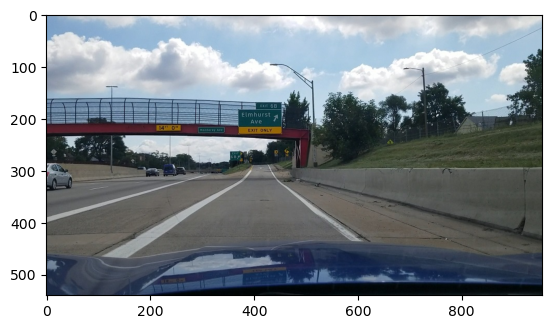

In [81]:
# Converting BGR color to RGB color format
detect_lane = cv2.cvtColor(detect_lane, cv2.COLOR_BGR2RGB)

plt.imshow(detect_lane)

In [82]:
detect_lane.shape

(540, 956, 3)

CONVERT TO GRAY SCALE IMAGE

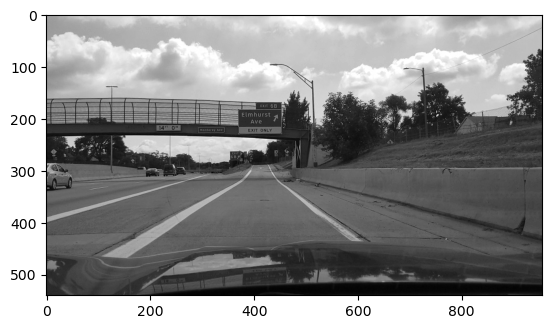

In [83]:
image_gray = cv2.cvtColor(detect_lane, cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray,cmap='gray')

In [84]:
image_gray

array([[171, 174, 176, ..., 212, 213, 213],
       [169, 171, 172, ..., 215, 216, 216],
       [167, 167, 167, ..., 217, 218, 219],
       ...,
       [ 40,  38,  43, ...,  21,  22,  22],
       [ 41,  40,  44, ...,  24,  25,  25],
       [ 45,  44,  47, ...,  26,  27,  27]], dtype=uint8)

GAUSSIAN BLURRING AND CANNY FILTERING

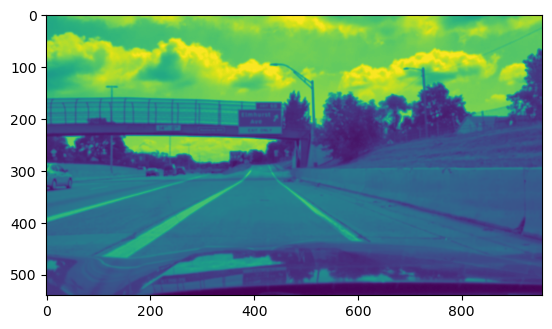

In [85]:
blurred_image=cv2.GaussianBlur(image_gray,(7,7),0)
plt.imshow(blurred_image)

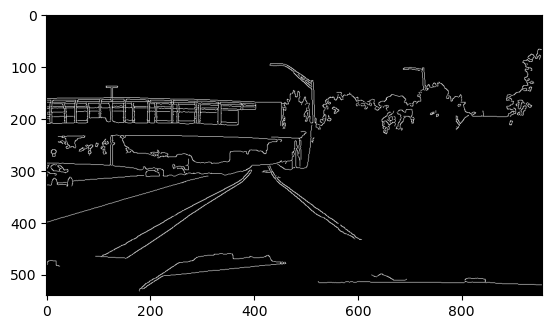

In [86]:
threshold_L=10
threshold_H=200

canny_image=cv2.Canny(blurred_image,threshold_L, threshold_H)
plt.imshow(canny_image, cmap='gray')

DEFINE THE REGION OF INTEREST 

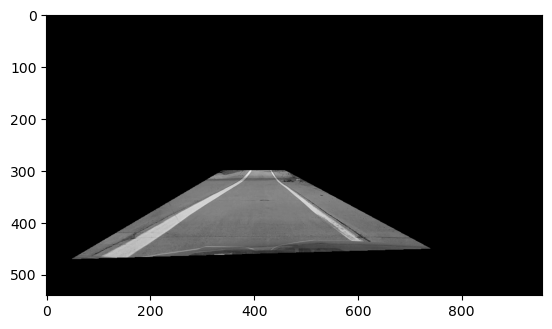

In [87]:
#region of interest
diamensions=np.array([[(50,470),(340,300),(460,300),(740,450)]],dtype=np.int32)
mask=np.zeros_like(image_gray)
cv2.fillPoly(mask,diamensions,255)
masked_image=cv2.bitwise_and(image_gray,mask)
plt.imshow(masked_image,cmap='gray')
plt.show()

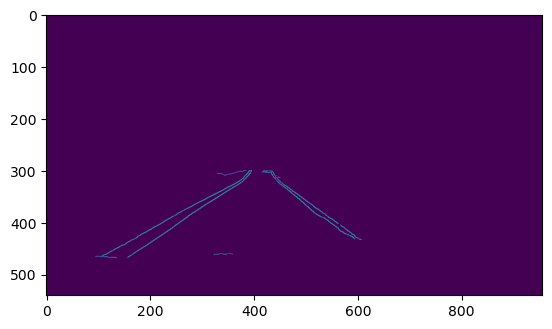

In [88]:
masked_image=cv2.bitwise_and(canny_image,masked_image)
plt.imshow(masked_image)
plt.show()

HOUGH LINES DETECTION AND DRAW FUNCTION 

In [89]:
rho = 2            # distance resolution in pixels 
theta = np.pi/180  # angular resolution in radians 
threshold = 40     # minimum number of votes 
min_line_len = 100  # minimum number of pixels making up a line
max_line_gap = 50  # maximum gap in pixels between connectable line segments

lines=cv2.HoughLinesP(masked_image,rho,theta,threshold,np.array([]),min_line_len,max_line_gap)

# Create an empty black image
line_image=np.zeros((masked_image.shape[0],masked_image.shape[1],3),dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),[0,0,255],10)
lines

array([[[157, 467, 330, 351]],

       [[419, 301, 608, 433]],

       [[107, 466, 227, 399]],

       [[228, 397, 388, 312]],

       [[473, 344, 576, 422]],

       [[106, 465, 315, 350]],

       [[505, 362, 606, 433]]], dtype=int32)

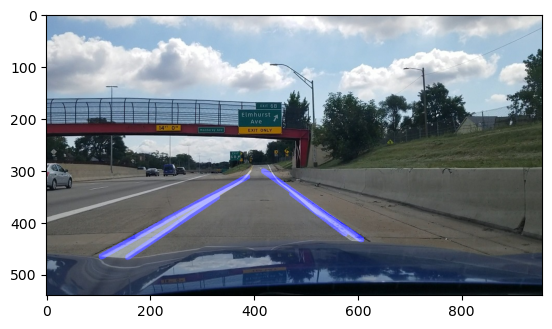

In [90]:
alpha=1
beta=1
gamma=0
# Resultant weighted image is calculated as follows: original_img * alpha + img * beta + gamma
image_with_lines=cv2.addWeighted(image,alpha,line_image,beta,gamma)
plt.imshow(image_with_lines)